In [1]:
import logging
#Logging is a means of tracking events that happen when some software runs
# Create and configure logger
logging.basicConfig(filename="../logs/newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

In [2]:
# Importing Libraries

from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from causalnex.discretiser.discretiser_strategy import DecisionTreeSupervisedDiscretiserMethod
#from causalnex.utils.network_utils import get_markov_blanket

from causalnex.evaluation import classification_report 
from causalnex.structure.notears import from_pandas
from causalnex.plots import NODE_STYLE, EDGE_STYLE
from causalnex.network import BayesianNetwork
import joblib

import numpy as np
import seaborn as sns
import os, sys, warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

/home/user/anaconda3/envs/causality/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import sys
sys.path.insert(0,'../scripts/')
from data_loader import load_df_from_csv
from data_struct import DataInfo
from data_cleaner import DataCleaner
%matplotlib inline


In [4]:
missing_values = ["n/a", "na", "undefined",'']
df= load_df_from_csv("../data/features_data.csv",na_values=missing_values)

In [5]:
missing_values = ["n/a", "na", "undefined",'']
full_df= load_df_from_csv("../data/clean_data.csv",na_values=missing_values)

In [6]:
explorer = DataInfo(df)
#initialize module to get data overview

In [7]:
full_explorer = DataInfo(full_df)
#initialize module to get data overview

In [8]:
explorer.get_basic_description()

The DataFrame containes 569 rows and 12 columns.
Current DataFrame Memory Usage:
57028
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       569 non-null    uint16 
 1   diagnosis        569 non-null    object 
 2   area_worst       569 non-null    float32
 3   area_mean        569 non-null    float32
 4   area_se          569 non-null    float32
 5   perimeter_worst  569 non-null    float32
 6   perimeter_mean   569 non-null    float32
 7   radius_worst     569 non-null    float32
 8   radius_mean      569 non-null    float32
 9   perimeter_se     569 non-null    float32
 10  texture_worst    569 non-null    float32
 11  texture_mean     569 non-null    float32
dtypes: float32(10), object(1), uint16(1)
memory usage: 27.9+ KB


In [9]:
full_explorer.get_basic_description()

The DataFrame containes 569 rows and 32 columns.
Current DataFrame Memory Usage:
102548
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    uint16 
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float32
 3   texture_mean             569 non-null    float32
 4   perimeter_mean           569 non-null    float32
 5   area_mean                569 non-null    float32
 6   smoothness_mean          569 non-null    float32
 7   compactness_mean         569 non-null    float32
 8   concavity_mean           569 non-null    float32
 9   concave points_mean      569 non-null    float32
 10  symmetry_mean            569 non-null    float32
 11  fractal_dimension_mean   569 

In [10]:
cleaner = DataCleaner(df)

In [11]:
cleaner.remove_unwanted_columns("Unnamed: 0")

,diagnosis,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,M,2019.000000,1001.000000,153.399994,184.600006,122.800003,25.379999,17.990000,8.589,17.330000,10.380000
1,M,1956.000000,1326.000000,74.080002,158.800003,132.899994,24.990000,20.570000,3.398,23.410000,17.770000
2,M,1709.000000,1203.000000,94.029999,152.500000,130.000000,23.570000,19.690001,4.585,25.530001,21.250000
3,M,567.700012,386.100006,27.230000,98.870003,77.580002,14.910000,11.420000,3.445,26.500000,20.379999
4,M,1575.000000,1297.000000,94.440002,152.199997,135.100006,22.540001,20.290001,5.438,16.670000,14.340000
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2027.000000,1479.000000,158.699997,166.100006,142.000000,25.450001,21.559999,7.673,26.400000,22.389999
565,M,1731.000000,1261.000000,99.040001,155.000000,131.199997,23.690001,20.129999,5.203,38.250000,28.250000
566,M,1124.000000,858.099976,48.549999,126.699997,108.300003,18.980000,16.600000,3.425,34.119999,28.080000
567,M,1821.000000,1265.000000,86.220001,184.600006,140.100006,25.740000,20.600000,5.772,39.419998,29.330000


In [12]:
cleaner = DataCleaner(full_df)

In [13]:
cleaner.remove_unwanted_columns("Unnamed: 0")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.379999,17.330000,184.600006,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990000,23.410000,158.800003,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570000,25.530001,152.500000,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910000,26.500000,98.870003,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540001,16.670000,152.199997,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450001,26.400000,166.100006,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690001,38.250000,155.000000,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980000,34.119999,126.699997,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740000,39.419998,184.600006,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Label Encode the categorical col

In [14]:
#for feature in X:
    # HINT: use fit_transform on X[feature] using the LabelEncoder() object
encoder = preprocessing.LabelEncoder() 
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
full_df['diagnosis'] = encoder.fit_transform(full_df['diagnosis'])

In [15]:
df.head()

,diagnosis,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,1,2019.000000,1001.000000,153.399994,184.600006,122.800003,25.379999,17.990000,8.589,17.330000,10.380000
1,1,1956.000000,1326.000000,74.080002,158.800003,132.899994,24.990000,20.570000,3.398,23.410000,17.770000
2,1,1709.000000,1203.000000,94.029999,152.500000,130.000000,23.570000,19.690001,4.585,25.530001,21.250000
3,1,567.700012,386.100006,27.230000,98.870003,77.580002,14.910000,11.420000,3.445,26.500000,20.379999
4,1,1575.000000,1297.000000,94.440002,152.199997,135.100006,22.540001,20.290001,5.438,16.670000,14.340000


In [16]:
scaler = StandardScaler()


In [17]:
scaled_df = scaler.fit_transform(df[df.columns.difference(['diagnosis'])])
scaled_full_df = scaler.fit_transform(full_df[full_df.columns.difference(['diagnosis'])])

In [18]:
import pandas as pd
df_scaled = pd.DataFrame(scaled_df, columns=[
  'area_worst', 'area_mean', 'area_se', 'perimeter_worst',
       'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se',
       'texture_worst', 'texture_mean'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,0.984375,2.487577,2.001237,1.269934,2.833031,2.303601,1.097064,1.886689,-2.073335,-1.359293
1,1.908708,0.742402,1.890489,1.685954,0.263327,1.535126,1.829821,1.805927,-0.353632,-0.369203
2,1.558884,1.181336,1.456285,1.566503,0.850928,1.347475,1.579888,1.511870,0.456187,-0.023974
3,-0.764464,-0.288378,-0.550021,-0.592687,0.286593,-0.249939,-0.768909,-0.281464,0.253732,0.133984
4,1.826229,1.190357,1.220724,1.776573,1.273190,1.338539,1.750297,1.298575,-1.151816,-1.466770


In [19]:
import pandas as pd
df_scaled_full = pd.DataFrame(scaled_full_df, columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
 ])
 
print("Scaled Dataset Using StandardScaler")
df_scaled_full.head()

Scaled Dataset Using StandardScaler


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.984375,2.487577,2.001237,3.283514,1.316862,2.616665,2.532475,0.660820,2.296076,2.652874,...,1.886689,1.568466,-0.214002,1.307686,2.217515,1.148757,2.750622,-2.073335,-0.565265,-1.359293
1,1.908708,0.742402,1.890489,-0.487072,-0.692926,-0.430444,0.548144,0.260162,1.087084,-0.023846,...,1.805927,-0.826963,-0.605351,-0.375612,0.001392,-0.805450,-0.243890,-0.353632,-0.876244,-0.369203
2,1.558884,1.181336,1.456285,1.052925,0.814973,1.082932,2.037231,1.424827,1.955000,1.363479,...,1.511870,0.942210,-0.297005,0.527407,0.939685,0.237036,1.152255,0.456187,-0.780083,-0.023974
3,-0.764464,-0.288378,-0.550021,3.402909,2.744280,3.893397,1.451707,1.115007,2.175786,1.915897,...,-0.281464,3.283553,0.689702,3.394275,2.867383,4.732680,6.046041,0.253732,-0.110409,0.133984
4,1.826229,1.190357,1.220724,0.539340,-0.048520,-0.313395,1.428493,1.144205,0.729259,1.371011,...,1.298575,0.280372,1.483067,0.220556,-0.009561,-0.361092,-0.868353,-1.151816,-0.790244,-1.466770


In [20]:
df_scaled.insert(loc=0, column='diagnosis', value= df.diagnosis)
df_scaled_full.insert(loc=0, column='diagnosis', value= full_df.diagnosis)

In [21]:
df_scaled.head()

,diagnosis,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,1,0.984375,2.487577,2.001237,1.269934,2.833031,2.303601,1.097064,1.886689,-2.073335,-1.359293
1,1,1.908708,0.742402,1.890489,1.685954,0.263327,1.535126,1.829821,1.805927,-0.353632,-0.369203
2,1,1.558884,1.181336,1.456285,1.566503,0.850928,1.347475,1.579888,1.511870,0.456187,-0.023974
3,1,-0.764464,-0.288378,-0.550021,-0.592687,0.286593,-0.249939,-0.768909,-0.281464,0.253732,0.133984
4,1,1.826229,1.190357,1.220724,1.776573,1.273190,1.338539,1.750297,1.298575,-1.151816,-1.466770


Create a causal graph using all training data (this will be considered as a ground truth)

In [22]:
%%time
sm = from_pandas(df_scaled, tabu_parent_nodes=['diagnosis'],w_threshold=0.8)

CPU times: user 1min 23s, sys: 1min 4s, total: 2min 27s
Wall time: 43.8 s


In [23]:
%%time
sm2 = from_pandas(df_scaled, tabu_parent_nodes=['diagnosis'],)

CPU times: user 1min 22s, sys: 1min 5s, total: 2min 27s
Wall time: 42.5 s


In [24]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [25]:
def plots_struct(sm):
        viz = plot_structure(
            sm,
            graph_attributes={"scale": "1.5", 'size': 2.5},
            all_node_attributes=NODE_STYLE.WEAK,
            all_edge_attributes=EDGE_STYLE.WEAK)
        return Image(viz.draw(format='png'))



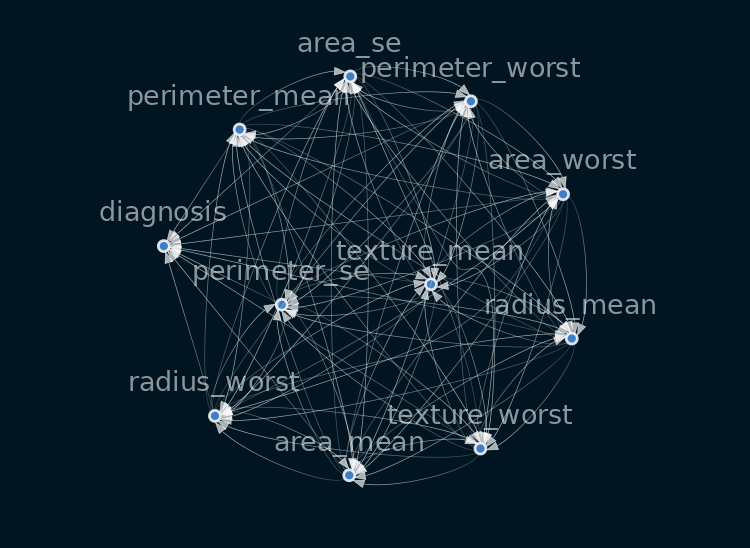

In [26]:
plots_struct(sm2)

## Remove edges that exceed the threshold

The reason why we have a fully connected graph here is we haven’t applied thresholding to the weaker edges. Thresholding can be applied either by specifying the value for the parameter w_threshold in from_pandas, or we can remove the edges by calling the structure model function, remove_edges_below_threshold.

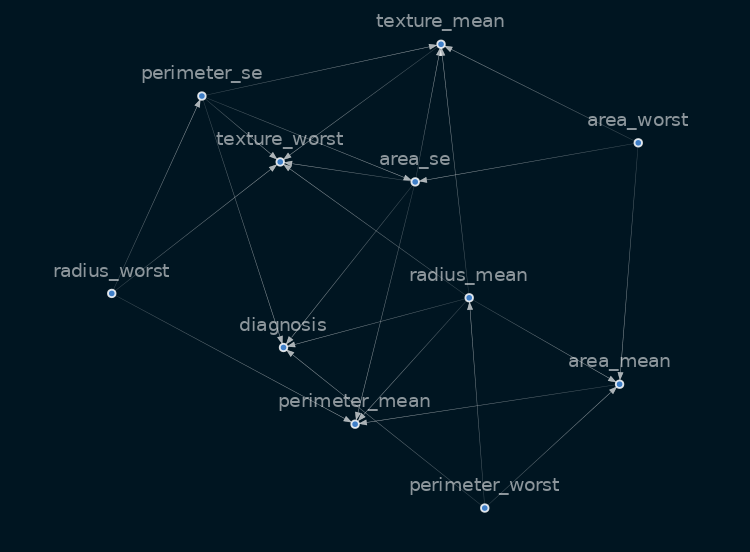

In [27]:
plots_struct(sm)

## Let us visualize the largest subgraph

In [28]:
sm3 = sm.get_largest_subgraph()

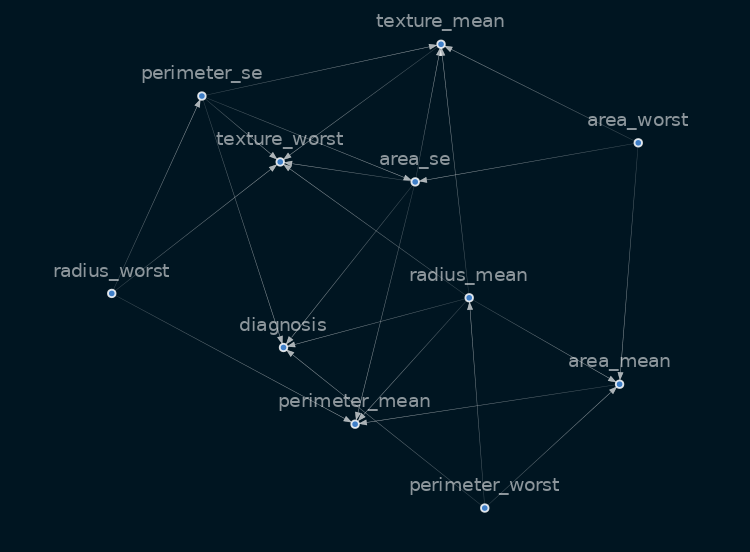

In [29]:
plots_struct(sm3)

## Stablity of Causal Graph-50%

In [30]:
def causal_graph (data, parent_node, percent): 
    try:
        portion = int(data.shape[0] * percent)
        x_portion = data.head(portion)

        sm = from_pandas(x_portion, tabu_parent_nodes=[parent_node],)
        sm.remove_edges_below_threshold(0.8)
        sm = sm.get_largest_subgraph() 
    return sm

SyntaxError: invalid syntax (1424552039.py, line 9)

In [31]:
x_selected = df_scaled.iloc[:, :10]

Stablity of Causal Graph -50%

In [32]:
portion = int(x_selected.shape[0] *.5)
x_portion = x_selected.head(portion)

CPU times: user 1min 50s, sys: 1min 28s, total: 3min 19s
Wall time: 59.2 s


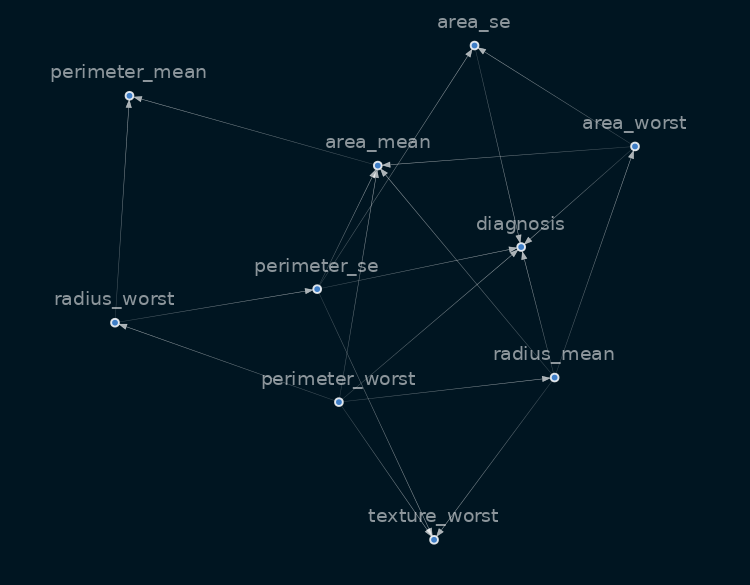

In [33]:
%%time
sm1 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm1.remove_edges_below_threshold(0.8)
sm1 = sm1.get_largest_subgraph()
plots_struct(sm1)


In [34]:
print(sm1.edges)

[('area_worst', 'diagnosis'), ('area_worst', 'area_mean'), ('area_worst', 'area_se'), ('area_mean', 'perimeter_mean'), ('area_se', 'diagnosis'), ('perimeter_worst', 'diagnosis'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_worst'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'texture_worst'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'perimeter_se'), ('radius_mean', 'diagnosis'), ('radius_mean', 'area_worst'), ('radius_mean', 'area_mean'), ('radius_mean', 'texture_worst'), ('perimeter_se', 'diagnosis'), ('perimeter_se', 'area_mean'), ('perimeter_se', 'area_se'), ('perimeter_se', 'texture_worst')]


Stablity of Causal Graph -60%

In [35]:
portion = int(x_selected.shape[0] *.6)
x_portion = x_selected.head(portion)

CPU times: user 1min 54s, sys: 1min 32s, total: 3min 27s
Wall time: 1min


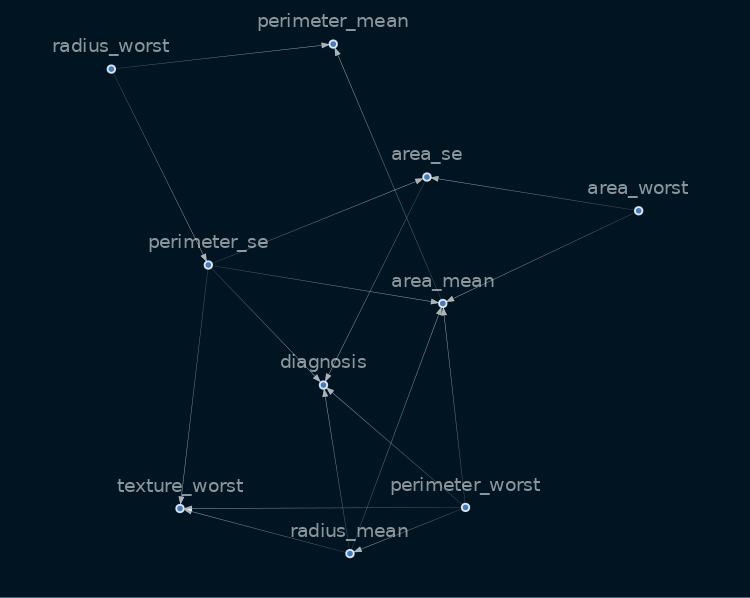

In [36]:
%%time
sm2 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm2.remove_edges_below_threshold(0.8)
sm2 = sm2.get_largest_subgraph()
plots_struct(sm2)

In [37]:
print(sm2.edges)

[('area_worst', 'area_mean'), ('area_worst', 'area_se'), ('area_mean', 'perimeter_mean'), ('area_se', 'diagnosis'), ('perimeter_worst', 'diagnosis'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'texture_worst'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'perimeter_se'), ('radius_mean', 'diagnosis'), ('radius_mean', 'area_mean'), ('radius_mean', 'texture_worst'), ('perimeter_se', 'diagnosis'), ('perimeter_se', 'area_mean'), ('perimeter_se', 'area_se'), ('perimeter_se', 'texture_worst')]


## Jaccard Similarity Index
The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. It follows the following equation to compute the similarity between two graphs.

$$J(A, B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A|+|B|- |A \cap B|}

In [38]:
def jaccard_similarity(A, B):
    """
    Calculate the Jaccard similarity between two given graphs.
    Parameters:
        A: graph 1
        B: graph 2  
    """
    i = set(A).intersection(B)
    return round(len(i) / (len(A) + len(B) - len(i)), 3)

In [39]:
jaccard_similarity(sm1.edges, sm2.edges)

0.85

70 %

In [40]:
portion = int(x_selected.shape[0]*.7)
x_portion = x_selected.head(portion)

CPU times: user 59.9 s, sys: 46.8 s, total: 1min 46s
Wall time: 32.5 s


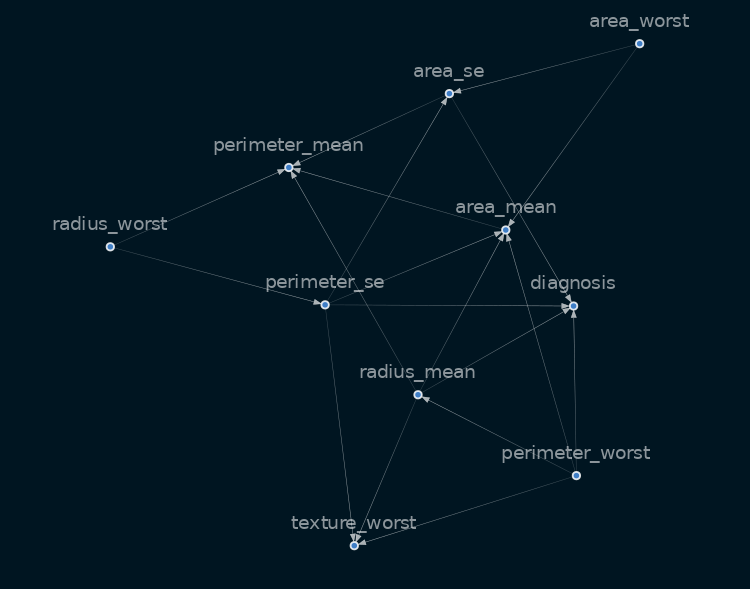

In [41]:
%%time
sm3 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm3.remove_edges_below_threshold(0.8)
sm3 = sm3.get_largest_subgraph()
plots_struct(sm3)

In [42]:
jaccard_similarity(sm2.edges, sm3.edges)

0.895

80 % of the data

In [43]:
portion = int(x_selected.shape[0] * .8)
x_portion = x_selected.head(portion)

CPU times: user 55.6 s, sys: 42.8 s, total: 1min 38s
Wall time: 27.4 s


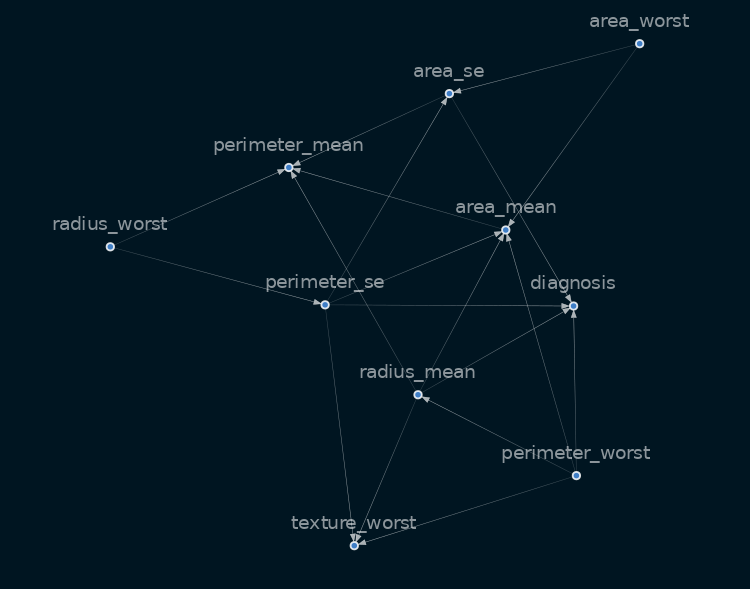

In [44]:
%%time
sm4 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm4.remove_edges_below_threshold(0.8)
sm4 = sm4.get_largest_subgraph()
plots_struct(sm4)

In [45]:
jaccard_similarity(sm3.edges, sm4.edges)

1.0

90%of the data

In [46]:
portion = int(x_selected.shape[0] * .9)
x_portion = x_selected.head(portion)

CPU times: user 1min 11s, sys: 55.3 s, total: 2min 6s
Wall time: 38.3 s


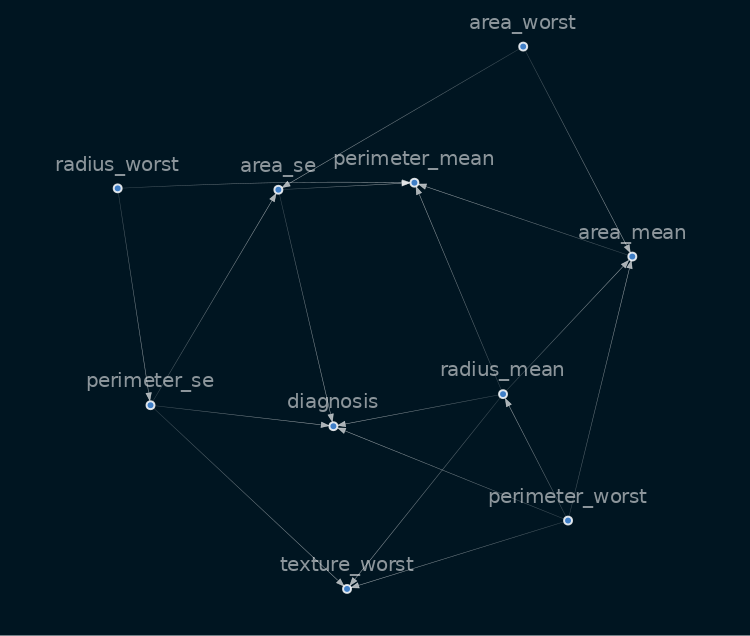

In [47]:
%%time
sm5 = from_pandas(x_portion, tabu_parent_nodes=['diagnosis'],)
sm5.remove_edges_below_threshold(0.8)
sm5 = sm5.get_largest_subgraph()
plots_struct(sm5)

In [48]:
jaccard_similarity(sm5.edges, sm4.edges)

0.947

100% of the data

CPU times: user 1min 6s, sys: 51.3 s, total: 1min 57s
Wall time: 34.5 s


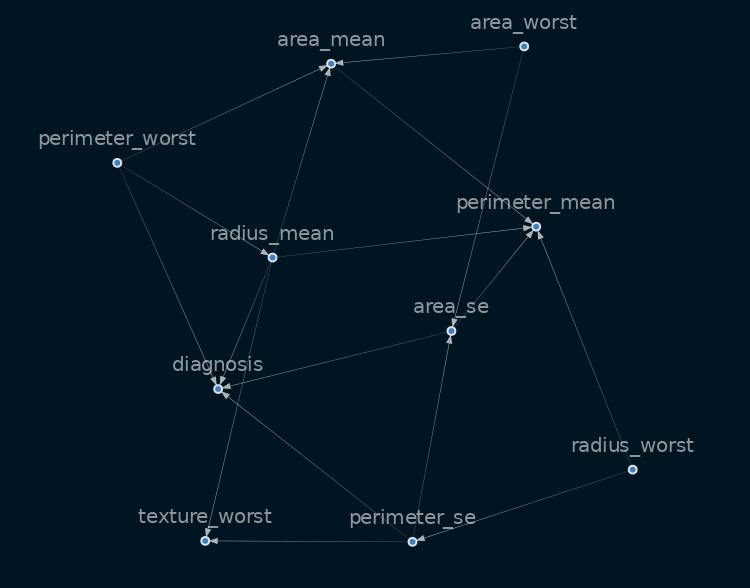

In [49]:
%%time
sm = from_pandas(x_selected, tabu_parent_nodes=['diagnosis'],)
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
plots_struct(sm)

In [50]:
jaccard_similarity(sm.edges, sm5.edges)

0.944

# Fitting the Conditional Distribution of the Bayesian Network
After deciding on how the final structure model should look, we can instantiate a BayesianNetwork.
## Reducing a Graph to its Markov Blanket
The Markov blanket (MB) of a variable is the subset of nodes in the Bayesian Network that contain all the useful information for predicting that variable. In other words, nodes outside a variable’s MB will (given knowledge of the nodes in the MB) have absolutely no influence on the variable of interest.

diagnosis is our variable of interest. We actually do not need all the nodes in the network but only the MB of target. To achieve that, we simply need to use the get_markov_blanket function from causalnex.

In [51]:

from causalnex.utils.network_utils import get_markov_blanket

In [53]:
bn = BayesianNetwork(sm)
blanket = get_markov_blanket(bn, 'diagnosis')
edge_list = list(blanket.structure.edges)
edge_list

[('area_se', 'diagnosis'),
 ('perimeter_worst', 'diagnosis'),
 ('perimeter_worst', 'radius_mean'),
 ('radius_mean', 'diagnosis'),
 ('perimeter_se', 'diagnosis'),
 ('perimeter_se', 'area_se')]

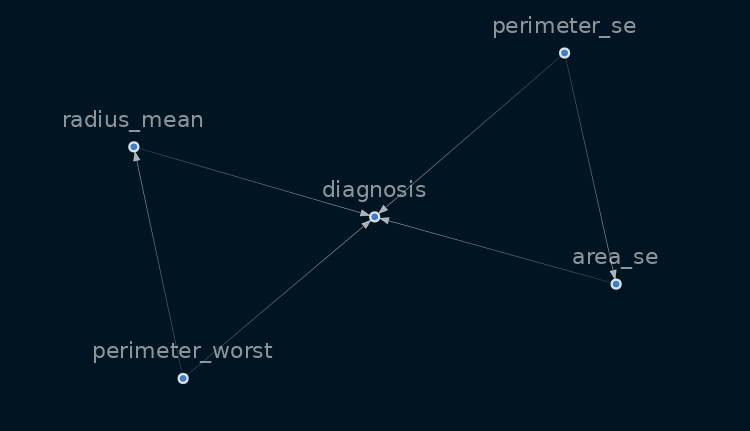

In [54]:
plots_struct(blanket.structure)

## Trainning a model using all variables
### Fitting Bayesian Network
Bayesian Networks represents dependencies between variables and their joint distribution. Bayesian Network is directed acyclic graph, where nodes are random variables and edges are causal connections between variables and represent conditional probability distribution. Once we have a structural model, we create our Bayesian Network and fit conditional probabilities

CasualNex provides BayesianNetwork implementation that we are going to use. But the BayesianNetwork implementation expects all its features to be discrete values. To discretizing our features, we used DecisionTreeSupervisedDiscretiserMethod provided by CasualNex

# Discretize

In [55]:

x_selected

,diagnosis,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst
0,1,0.984375,2.487577,2.001237,1.269934,2.833031,2.303601,1.097064,1.886689,-2.073335
1,1,1.908708,0.742402,1.890489,1.685954,0.263327,1.535126,1.829821,1.805927,-0.353632
2,1,1.558884,1.181336,1.456285,1.566503,0.850928,1.347475,1.579888,1.511870,0.456187
3,1,-0.764464,-0.288378,-0.550021,-0.592687,0.286593,-0.249939,-0.768909,-0.281464,0.253732
4,1,1.826229,1.190357,1.220724,1.776573,1.273190,1.338539,1.750297,1.298575,-1.151816
...,...,...,...,...,...,...,...,...,...,...
564,1,2.343856,2.604187,2.015301,2.060786,2.379583,1.752563,2.110995,1.901186,0.721472
565,1,1.723842,1.291565,1.494959,1.615931,1.156857,1.421940,1.704854,1.536720,2.085134
566,1,0.577953,0.180698,0.427906,0.672676,0.276693,0.579000,0.702284,0.561361,2.045574
567,1,1.735218,1.009503,1.653171,1.982524,1.438529,2.303601,1.838341,1.961239,2.336457


In [57]:
features = list(x_selected.columns.difference(['diagnosis']))
features


['area_mean',
 'area_se',
 'area_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_worst',
 'texture_worst']

In [59]:
tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
    mode='single',
    tree_params={'max_depth': 3, 'random_state': 27},
)
tree_discretiser.fit(
    feat_names=features,
    dataframe=x_selected ,
    target_continuous=True,
    target='diagnosis',
)
tree_discretiser

DecisionTreeSupervisedDiscretiserMethod(tree_params={'max_depth': 3,
                                                     'random_state': 27})

In [60]:
discretised_data = x_selected.copy()
for col in features:
    discretised_data[col] = tree_discretiser.transform(x_selected[[col]])




## Train Test Split

In [61]:
train, test = train_test_split( discretised_data, train_size=0.8, test_size=0.2, random_state=27)

In [69]:
model = BayesianNetwork(blanket.structure)
model = model.fit_node_states(discretised_data)
model = model.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [70]:
pred = model.predict(test, 'diagnosis')
true = test['diagnosis']
pred

,diagnosis_prediction
191,0
120,0
535,1
282,1
463,0
...,...
492,1
182,1
443,0
507,0


In [71]:
print('Recall: {:.2f}'.format(recall_score(y_true=true, y_pred=pred)))
print('F1: {:.2f} '.format(f1_score(y_true=true, y_pred=pred)))
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))
print('Precision: {:.2f} '.format(precision_score(y_true=true, y_pred=pred)))

Recall: 0.87
F1: 0.90 
Accuracy: 0.92 
Precision: 0.93 


In [74]:
from causalnex.evaluation import classification_report

classification_report(model, test, "diagnosis")

{'diagnosis_0': {'precision': 0.9166666666666666,
  'recall': 0.9565217391304348,
  'f1-score': 0.9361702127659574,
  'support': 69},
 'diagnosis_1': {'precision': 0.9285714285714286,
  'recall': 0.8666666666666667,
  'f1-score': 0.896551724137931,
  'support': 45},
 'accuracy': 0.9210526315789473,
 'macro avg': {'precision': 0.9226190476190477,
  'recall': 0.9115942028985508,
  'f1-score': 0.9163609684519443,
  'support': 114},
 'weighted avg': {'precision': 0.9213659147869674,
  'recall': 0.9210526315789473,
  'f1-score': 0.9205313356759469,
  'support': 114}}

In [75]:

from causalnex.evaluation import roc_auc
roc, auc = roc_auc(model, test, "diagnosis")
print(auc)

0.9742997845490919


## Inference

In [76]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(model)
marginals = ie.query()
marginals["diagnosis"]

{0: 0.5709246720426858, 1: 0.4290753279573112}

The output observed tells us that P(0 - P) = 0.57, and the P(1- M) = 0.43. 

In [77]:
joblib.dump(model, "../models/bayesian_model_1.pkl") 

['../models/bayesian_model_1.pkl']

Trainning a model using only the variables selected by the graph

In [ ]:
selected_features = ['diagnosis', 'radius_mean', 'perimeter_se', 'perimeter_mean', 'area_se']
feature_df = scaled_df[selected_features]

discretised_data = discretizer(feature_df, scaled_df)
discretised_data.head()

In [ ]:
joblib.dump(model2, "../models/bayesian_model_2.pkl") 

>1, train: 1.000, test: 0.912
>2, train: 0.945, test: 0.895
>3, train: 0.945, test: 0.912
>4, train: 0.934, test: 0.877
>5, train: 0.952, test: 0.904
>6, train: 0.949, test: 0.895
>7, train: 0.945, test: 0.921
>8, train: 0.938, test: 0.912
>9, train: 0.945, test: 0.939
>10, train: 0.941, test: 0.904
>11, train: 0.936, test: 0.947
>12, train: 0.936, test: 0.904
>13, train: 0.938, test: 0.930
>14, train: 0.936, test: 0.912
>15, train: 0.938, test: 0.904
>16, train: 0.936, test: 0.904
>17, train: 0.936, test: 0.912
>18, train: 0.932, test: 0.912
>19, train: 0.934, test: 0.912
>20, train: 0.938, test: 0.921
>21, train: 0.938, test: 0.912
>22, train: 0.936, test: 0.912
>23, train: 0.938, test: 0.921
>24, train: 0.932, test: 0.912
>25, train: 0.934, test: 0.912
>26, train: 0.934, test: 0.921
>27, train: 0.938, test: 0.912
>28, train: 0.936, test: 0.912
>29, train: 0.938, test: 0.912
>30, train: 0.938, test: 0.921
>31, train: 0.938, test: 0.921
>32, train: 0.936, test: 0.904
>33, train: 0.938

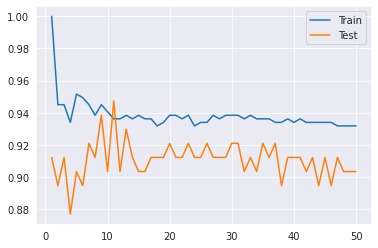

In [79]:
# Evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

y = x_selected['diagnosis']
X = x_selected.drop(columns = ['diagnosis'], axis=1)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 51)]

# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-', label='Train')
pyplot.plot(values, test_scores, '-', label='Test')
pyplot.legend()
pyplot.show()